In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
import plotly.graph_objs as go 
import cufflinks as cf
import datetime


from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data,wb

%matplotlib inline

Get The Data

In [3]:
iris = sns.load_dataset('iris')

Data Processing

In [4]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

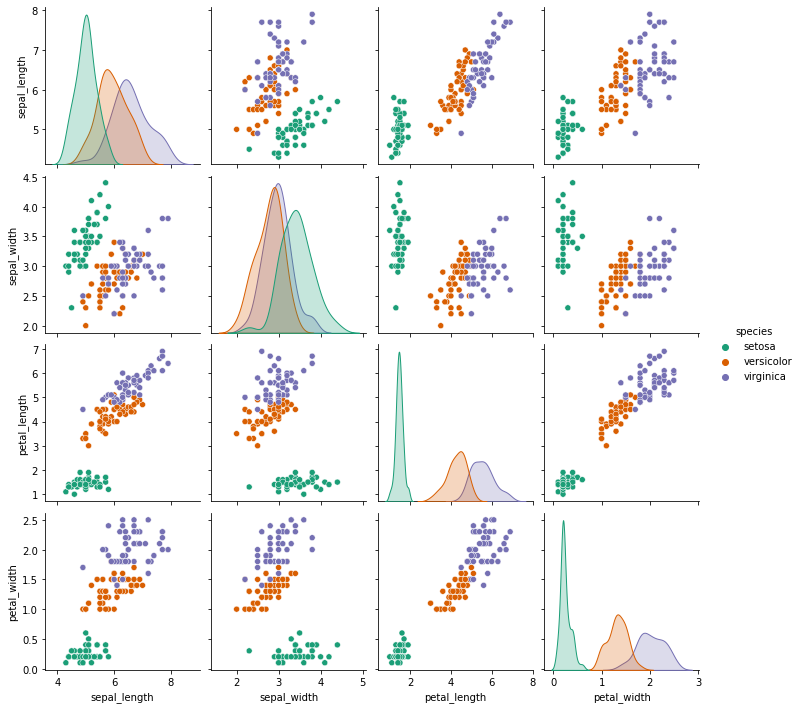

In [8]:
sns.pairplot(iris, hue="species",palette="Dark2")

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:1718: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.



<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

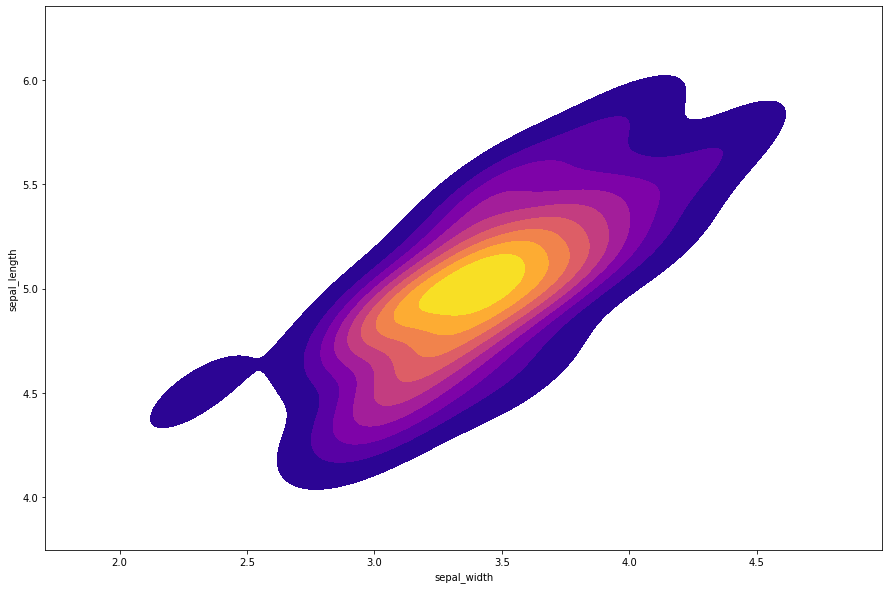

In [33]:
plt.figure(figsize=(15,10))
setosa = iris[iris['species']=="setosa"]
sns.kdeplot(setosa["sepal_width"],setosa["sepal_length"], cmap="plasma",shade=True,
            shade_lowest=False)

Feature Selection

In [10]:
feature = iris.drop("species", axis=1)
target = iris["species"]

Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target, test_size=0.3, random_state=101)

In [16]:
xtrain.shape, xtest.shape

((105, 4), (45, 4))

In [17]:
ytrain.shape,ytest.shape

((105,), (45,))

Modeling

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(xtrain,ytrain.values.ravel())

SVC()

Model Evaluation

In [19]:
predictions = model.predict(xtest)

Metrics

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ytest,predictions))
print(classification_report(ytest,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1,1,10,100], "gamma":[1,0.1,0.01,0.001]}

In [30]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [31]:
grid_predictions = grid.predict(xtest)

In [32]:
print(confusion_matrix(ytest,grid_predictions))
print(classification_report(ytest,grid_predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

